# ANÁLISE DE DADOS COVID - APP STREAMLIT

In [38]:
import pandas as pd
import streamlit
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

In [7]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

In [11]:
print(dados_2019.shape)
print(dados_2020.shape)

(12339, 6)
(14666, 6)


## Desafio 01 - Acessar o portal e verificar como são classificados os dados

In [13]:
dados_2020['tipo_doenca'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [16]:
dados_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,11
2,AC,OUTRAS,HOSPITAL,< 9,F,44
3,AC,OUTRAS,HOSPITAL,< 9,M,43
4,AC,OUTRAS,OUTRO,< 9,F,4


In [14]:
dados_2019['tipo_doenca'].value_counts()

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [15]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [17]:
#agrupou por tipo de doença e somamos os óbitos
dados_2020.groupby('tipo_doenca')['total'].sum()

tipo_doenca
COVID                         177299
INDETERMINADA                   9063
INSUFICIENCIA_RESPIRATORIA     93304
OUTRAS                        647807
PNEUMONIA                     171938
SEPTICEMIA                    153033
SRAG                           15715
Name: total, dtype: int64

In [18]:
#fazendo a mesma coisa com os dados 2019
dados_2019.groupby('tipo_doenca')['total'].sum()

tipo_doenca
COVID                              1
INDETERMINADA                   6977
INSUFICIENCIA_RESPIRATORIA    100361
OUTRAS                        658891
PNEUMONIA                     225933
SEPTICEMIA                    175104
SRAG                            1497
Name: total, dtype: int64

## AULA 02 - ANÁLISE EXPLORATÓRIA DOS DADOS

In [19]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12339 entries, 0 to 12338
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12339 non-null  object
 1   tipo_doenca   12339 non-null  object
 2   local_obito   12339 non-null  object
 3   faixa_etaria  12339 non-null  object
 4   sexo          12337 non-null  object
 5   total         12339 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 578.5+ KB


In [20]:
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14666 entries, 0 to 14665
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            14666 non-null  object
 1   tipo_doenca   14666 non-null  object
 2   local_obito   14666 non-null  object
 3   faixa_etaria  14666 non-null  object
 4   sexo          14665 non-null  object
 5   total         14666 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 687.6+ KB


In [22]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [23]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [24]:
proporcao = total_obitos_2020/total_obitos_2019

In [25]:
#proporção das mortes em 2020 e 2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


In [27]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
5134,SE,OUTRAS,OUTRO,40 - 49,M,7
13141,BA,OUTRAS,OUTRO,> 100,F,7
6390,RN,INSUFICIENCIA_RESPIRATORIA,OUTROS_SERVICOS_SAUDE,50 - 59,M,8
11223,RJ,SRAG,OUTROS_SERVICOS_SAUDE,80 - 89,M,15
7575,PA,INDETERMINADA,DOMICILIO,60 - 69,M,14


In [41]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    
    dados = pd.DataFrame({'Total': lista,
                           'Ano': [2019, 2020]})
    plt.figure(figsize=(10,8))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(f'Óbitos por {causa}', fontsize=20)
    plt.show()
    


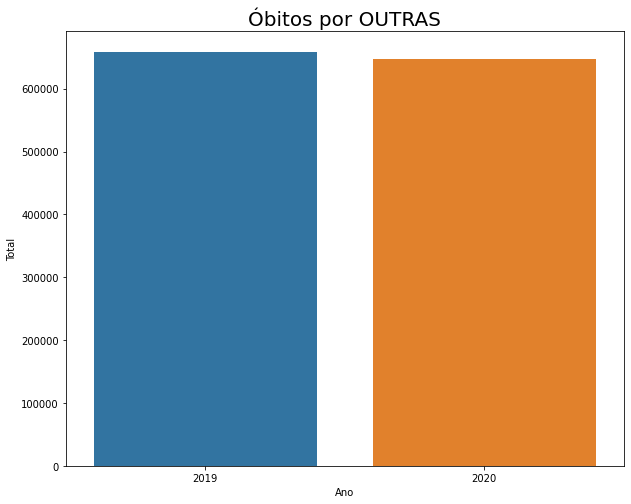

In [45]:
grafico_comparativo('OUTRAS')